# Random Forest

salinityLoad Random Forest R²: 0.6847451893475462
salinityLoad Random Forest MSE: 302311.9248464759


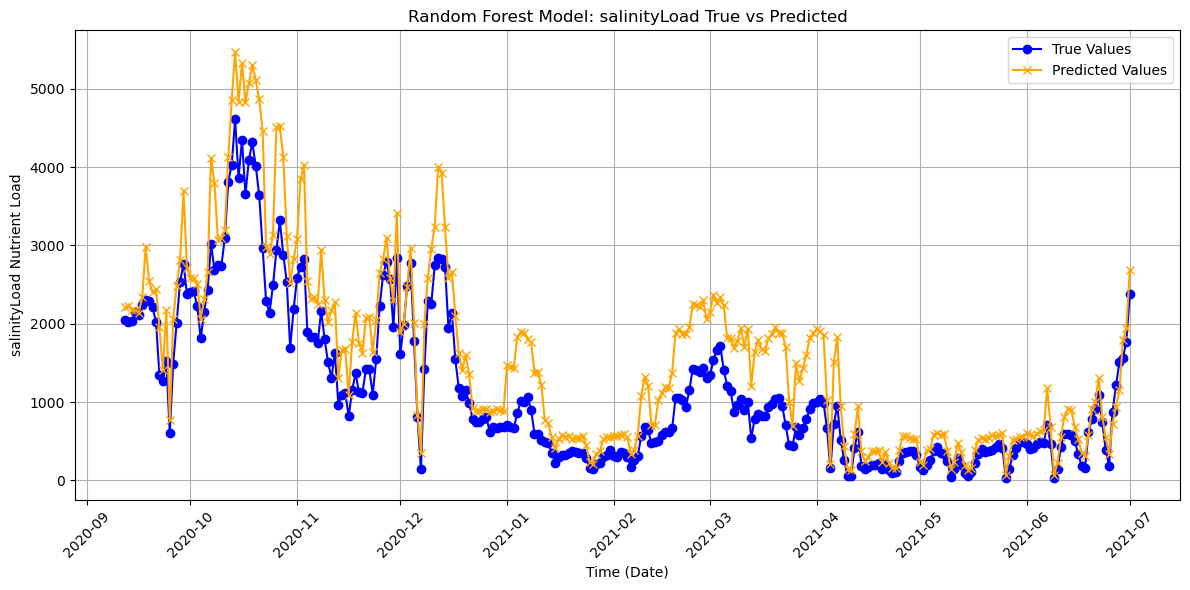

phosphateLoad Random Forest R²: 0.19350627075590665
phosphateLoad Random Forest MSE: 276.277854437958


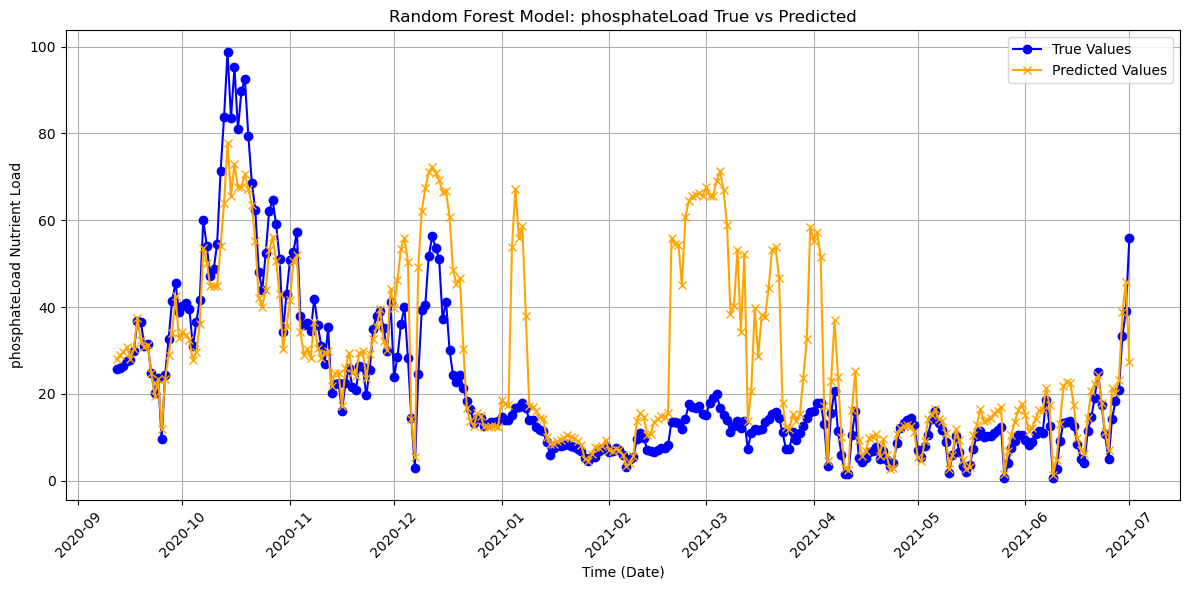

particulateOrganicPhosphorusLoad Random Forest R²: 0.9749031899783701
particulateOrganicPhosphorusLoad Random Forest MSE: 1263.5944004717473


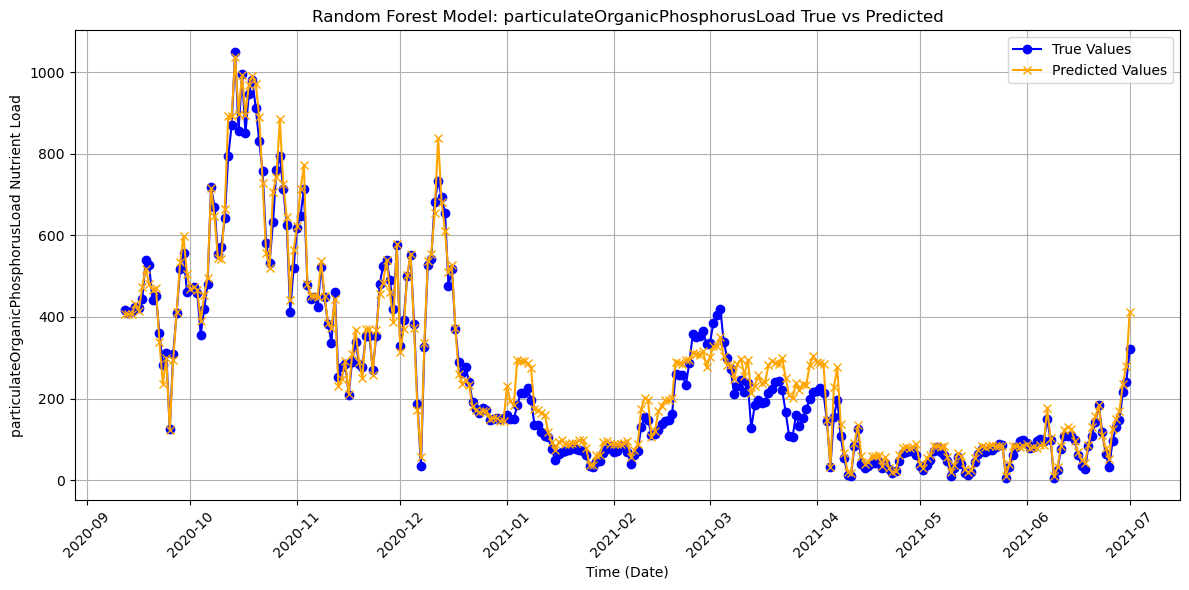

ammoniumLoad Random Forest R²: 0.44890008844508855
ammoniumLoad Random Forest MSE: 1353.0016208364436


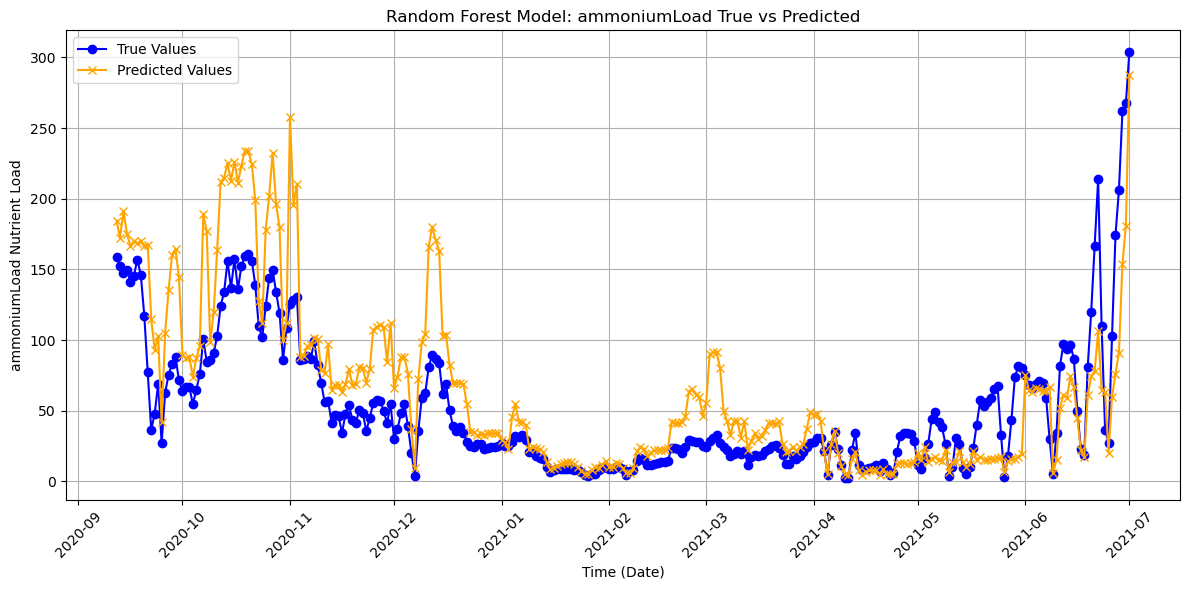

particulateOrganicNitrogenLoad Random Forest R²: 0.975174138591344
particulateOrganicNitrogenLoad Random Forest MSE: 229439.8132004391


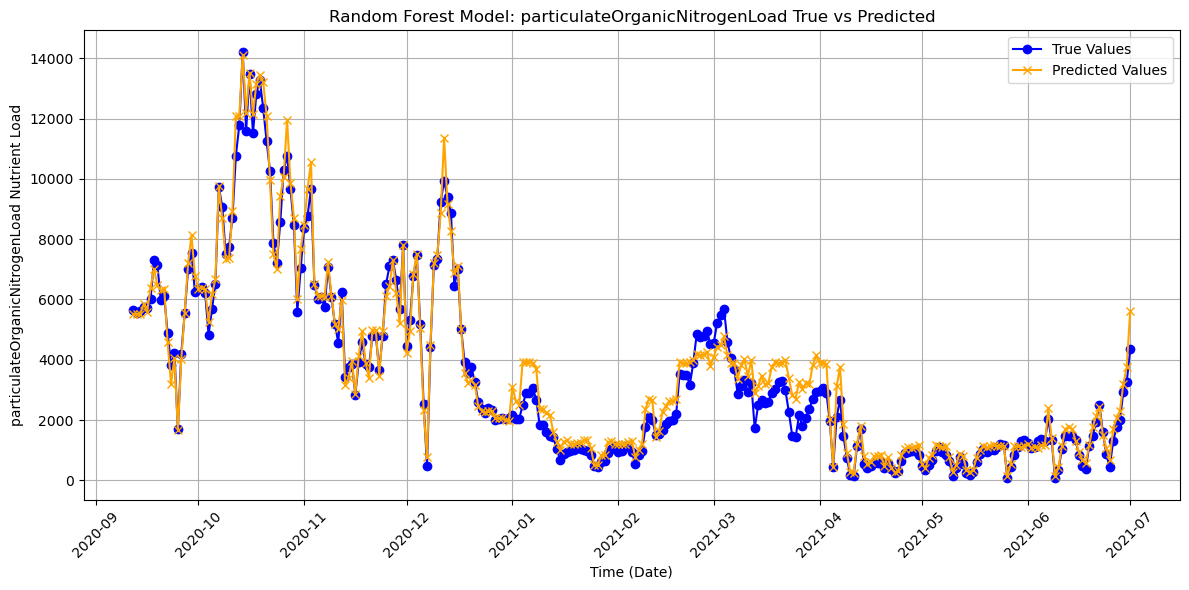

dissolvedSilicaLoad Random Forest R²: 0.6900883311785496
dissolvedSilicaLoad Random Forest MSE: 2465287.226692499


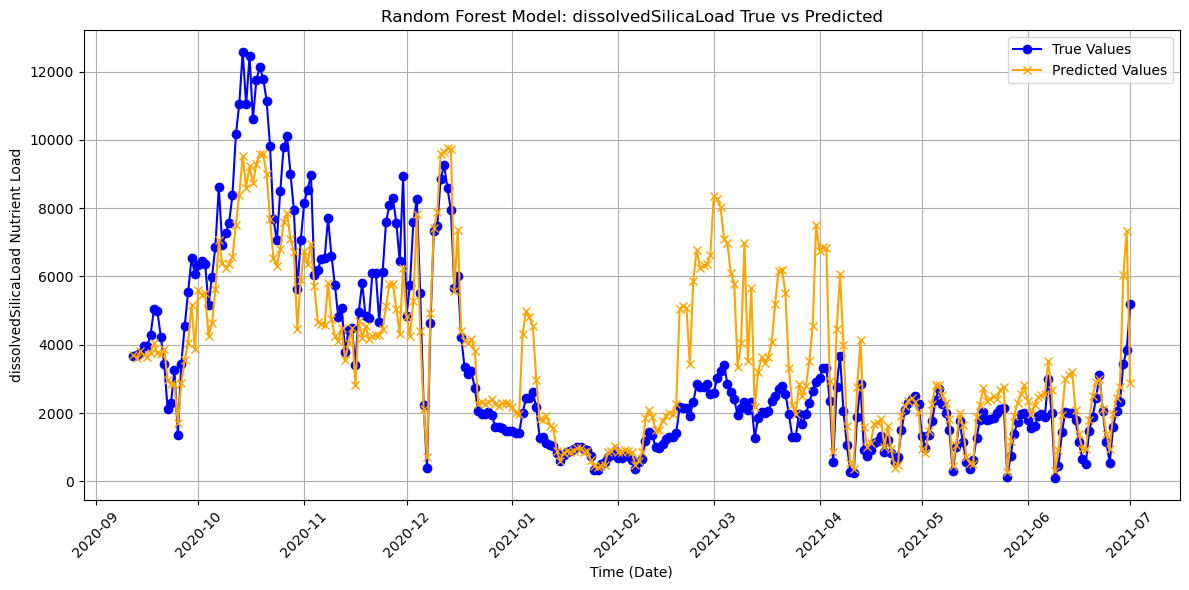

chlorophyllaLoad Random Forest R²: 0.9110540123180797
chlorophyllaLoad Random Forest MSE: 761.2070877571027


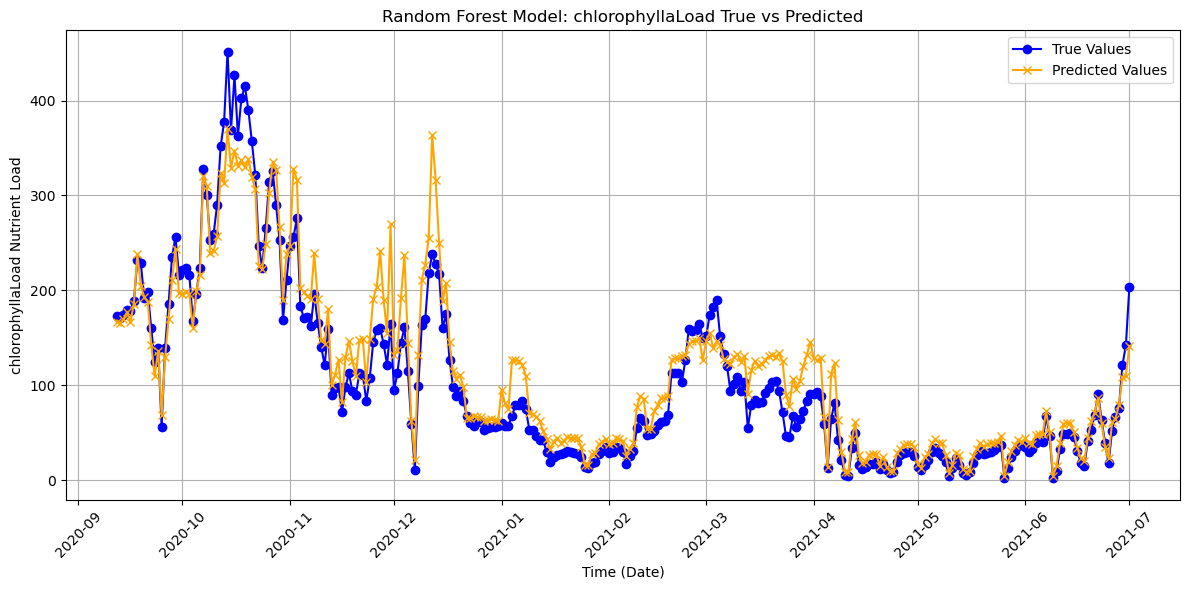

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

data = pd.read_csv('002.csv')

data['SampleDate'] = pd.to_datetime(data['SampleDate'])
data['Year'] = data['SampleDate'].dt.year
data['Month'] = data['SampleDate'].dt.month
data['Day'] = data['SampleDate'].dt.day
data['Weekday'] = data['SampleDate'].dt.weekday

data_cleaned = data.drop(columns=['Description', 'SampleDate'])

target_columns = ['salinityLoad', 'phosphateLoad', 'particulateOrganicPhosphorusLoad', 
                  'ammoniumLoad', 'particulateOrganicNitrogenLoad', 'dissolvedSilicaLoad', 'chlorophyllaLoad']

for target in target_columns:
    y = data_cleaned[target]

    X = data_cleaned[['Flow', 'Year', 'Month', 'Day', 'Weekday']]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

    rf_model = RandomForestRegressor(random_state=42)
    rf_model.fit(X_train, y_train)

    y_pred_rf = rf_model.predict(X_test)

    r2_rf = r2_score(y_test, y_pred_rf)
    mse_rf = mean_squared_error(y_test, y_pred_rf)
    print(f"{target} Random Forest R²: {r2_rf}")
    print(f"{target} Random Forest MSE: {mse_rf}")

    plt.figure(figsize=(12, 6))
    plt.plot(data['SampleDate'].iloc[len(y_train):], y_test.values, label='True Values', color='blue', linestyle='-', marker='o')
    plt.plot(data['SampleDate'].iloc[len(y_train):], y_pred_rf, label='Predicted Values', color='orange', linestyle='-', marker='x')
    plt.title(f'Random Forest Model: {target} True vs Predicted')
    plt.xlabel('Time (Date)')
    plt.ylabel(f'{target} Nutrient Load')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# SVM

salinityLoad SVR R²: 0.9240934954390374
salinityLoad SVR MSE: 72790.13904561897


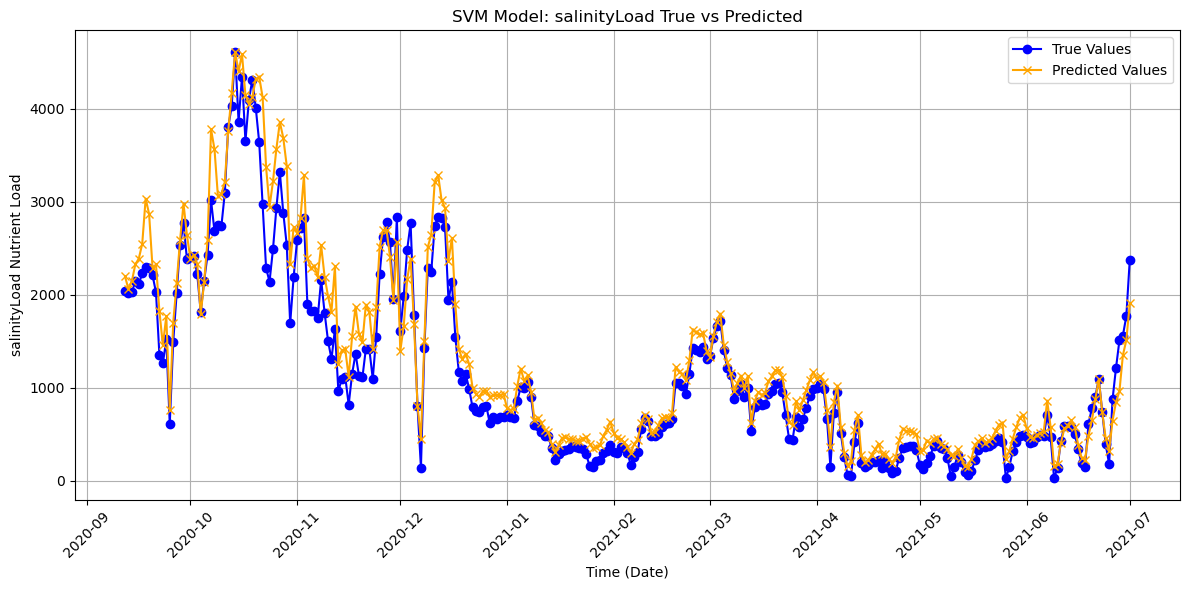

phosphateLoad SVR R²: 0.4889361754037782
phosphateLoad SVR MSE: 175.07342192559912


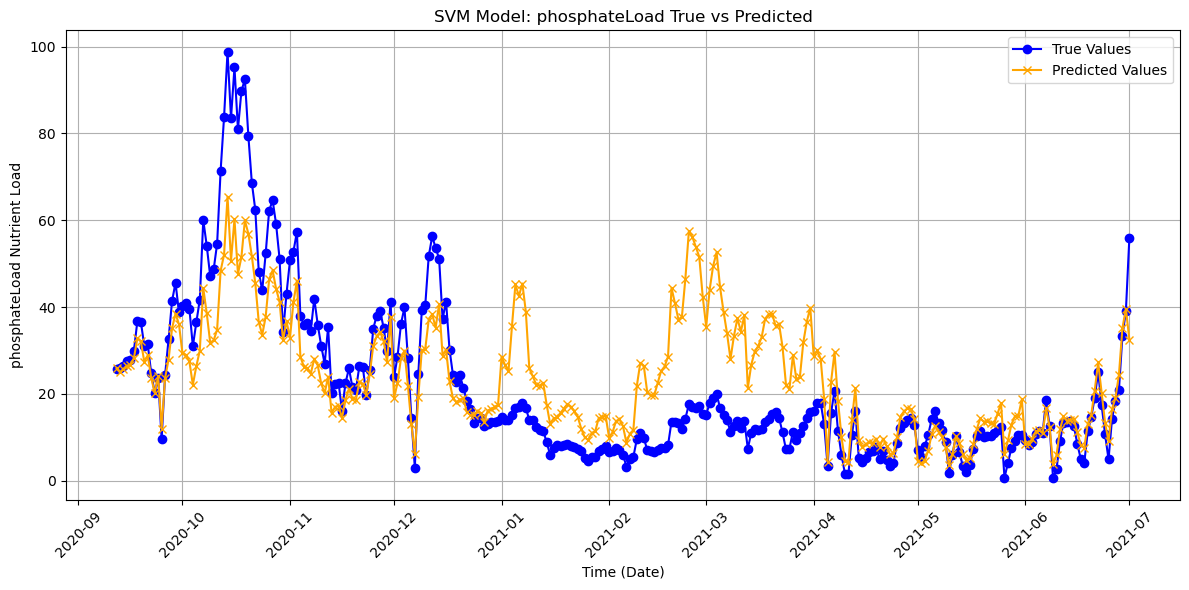

particulateOrganicPhosphorusLoad SVR R²: 0.981254346998832
particulateOrganicPhosphorusLoad SVR MSE: 943.8212324613221


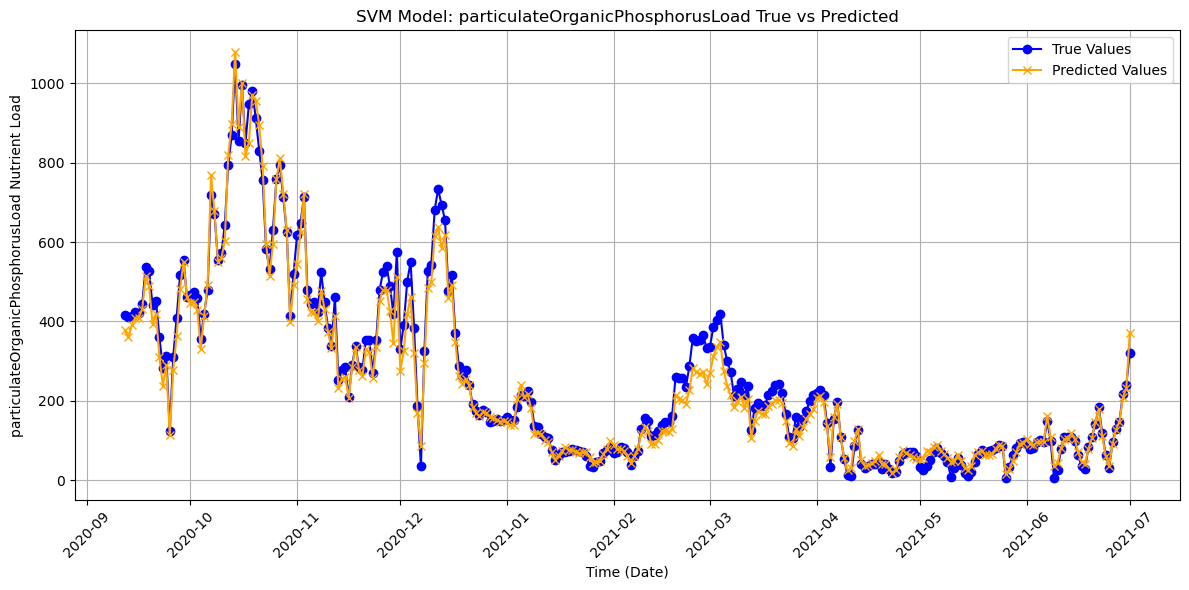

ammoniumLoad SVR R²: -1.648997110905278
ammoniumLoad SVR MSE: 6503.534675833056


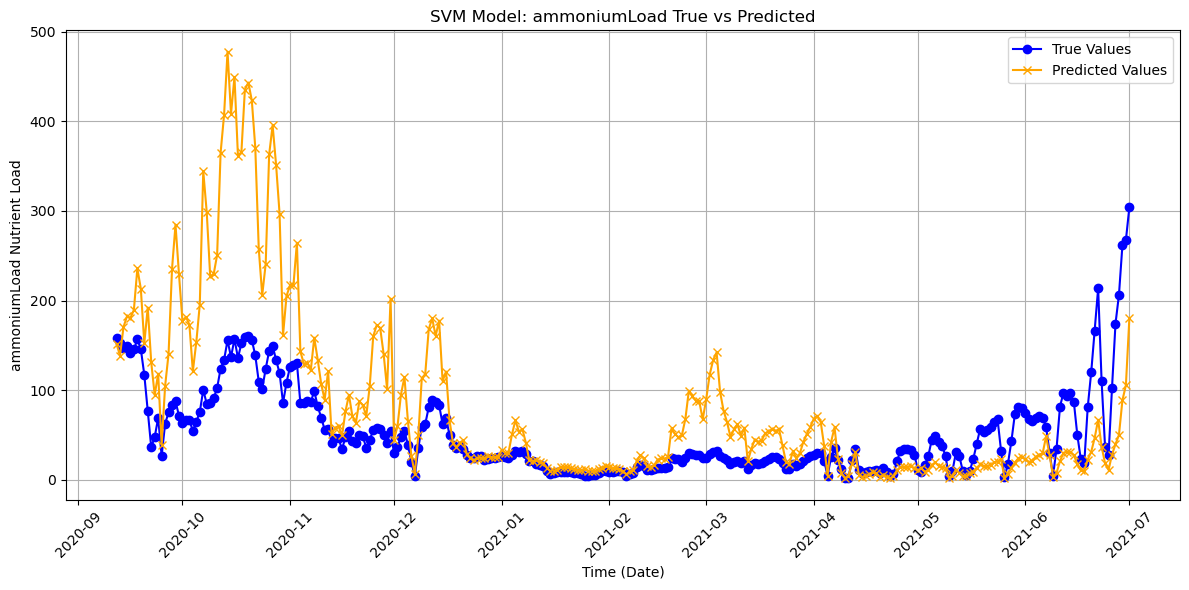

particulateOrganicNitrogenLoad SVR R²: 0.8919449117896171
particulateOrganicNitrogenLoad SVR MSE: 998641.6521967299


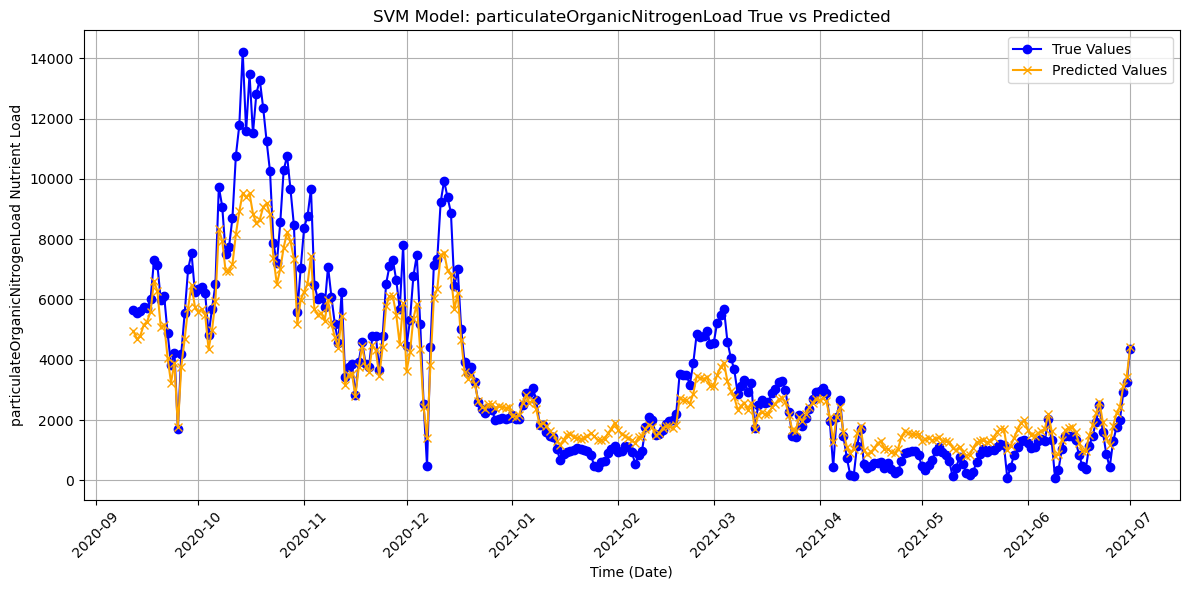

dissolvedSilicaLoad SVR R²: 0.5044440595727704
dissolvedSilicaLoad SVR MSE: 3942051.4067532253


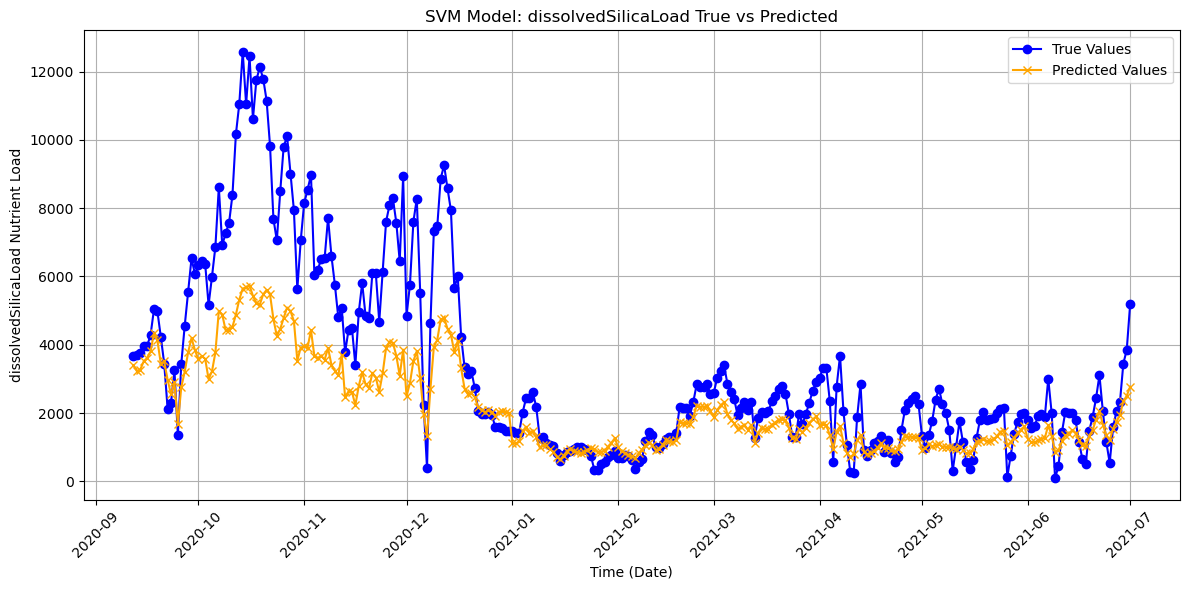

chlorophyllaLoad SVR R²: 0.9414610349801539
chlorophyllaLoad SVR MSE: 500.9812836350075


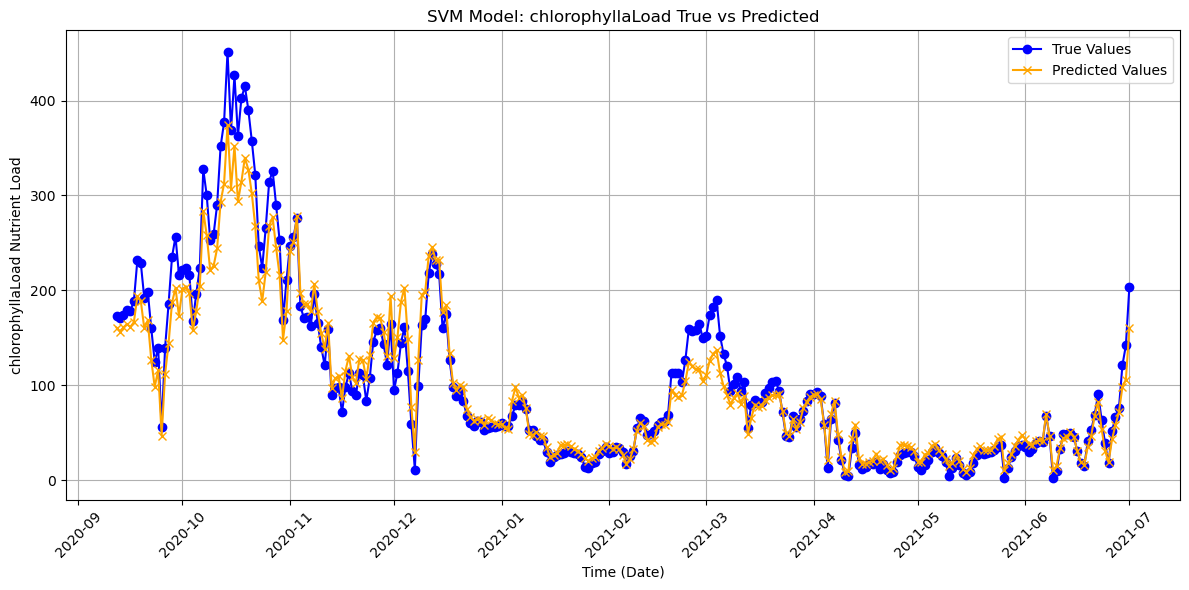

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

data = pd.read_csv('002.csv')

data['SampleDate'] = pd.to_datetime(data['SampleDate'])
data['Year'] = data['SampleDate'].dt.year
data['Month'] = data['SampleDate'].dt.month
data['Day'] = data['SampleDate'].dt.day
data['Weekday'] = data['SampleDate'].dt.weekday

data_cleaned = data.drop(columns=['Description', 'SampleDate'])

target_columns = ['salinityLoad', 'phosphateLoad', 'particulateOrganicPhosphorusLoad', 
                  'ammoniumLoad', 'particulateOrganicNitrogenLoad', 'dissolvedSilicaLoad', 'chlorophyllaLoad']

for target in target_columns:
    y = data_cleaned[target]

    X = data_cleaned[['Flow', 'Year', 'Month', 'Day', 'Weekday']]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

    svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.01)
    svr_model.fit(X_train, y_train)

    y_pred_svr = svr_model.predict(X_test)

    r2_svr = r2_score(y_test, y_pred_svr)
    mse_svr = mean_squared_error(y_test, y_pred_svr)
    print(f"{target} SVR R²: {r2_svr}")
    print(f"{target} SVR MSE: {mse_svr}")

    plt.figure(figsize=(12, 6))
    plt.plot(data['SampleDate'].iloc[len(y_train):], y_test.values, label='True Values', color='blue', linestyle='-', marker='o')
    plt.plot(data['SampleDate'].iloc[len(y_train):], y_pred_svr, label='Predicted Values', color='orange', linestyle='-', marker='x')
    plt.title(f'SVM Model: {target} True vs Predicted')
    plt.xlabel('Time (Date)')
    plt.ylabel(f'{target} Nutrient Load')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# LSTM

Epoch 1/20


E:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 3800182.0000 - val_loss: 2276191.0000
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3785457.5000 - val_loss: 2275519.2500
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4002650.5000 - val_loss: 2274433.5000
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3479874.0000 - val_loss: 2272806.0000
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4009546.5000 - val_loss: 2270293.5000
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3313908.7500 - val_loss: 2266906.7500
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3775285.2500 - val_loss: 2262384.7500
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3952300.2500 - val_loss: 2256791.0000
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3570682.5000 - val_loss: 2250155.0000
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3851432.7500 - val_loss: 2242221.2500
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/ste

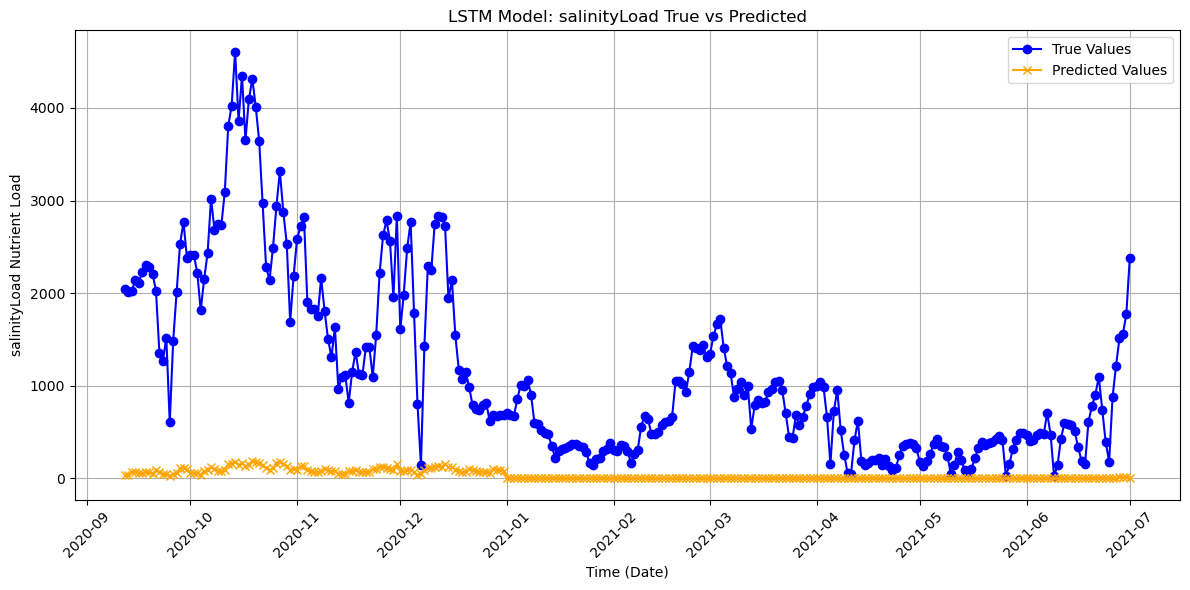

Epoch 1/20


E:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 802.6563 - val_loss: 786.7806
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 833.5938 - val_loss: 775.7453
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 887.2109 - val_loss: 758.2743
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 844.1877 - val_loss: 732.1087
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 721.8728 - val_loss: 694.7535
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 721.0419 - val_loss: 644.1573
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 574.2040 - val_loss: 585.2025
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 528.5795 - val_loss: 517.4789
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 439.5284 - val_loss: 449.0056
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 367.1068 - val_loss: 387.3846
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 289.7272 - val_loss: 330.7961
Epoch 12/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0

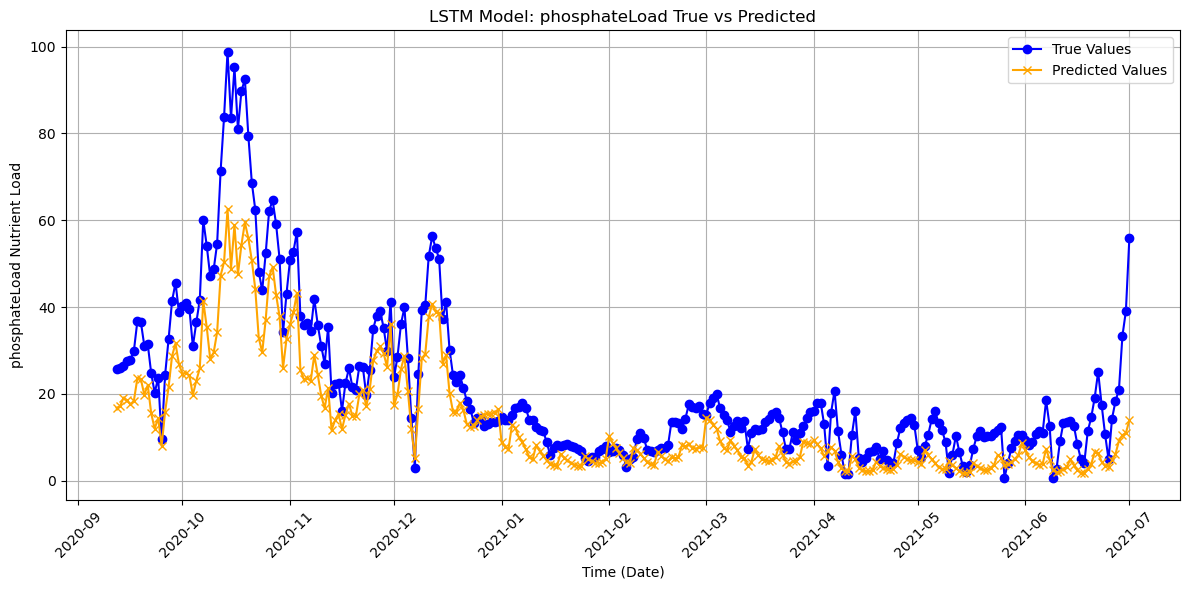

Epoch 1/20


E:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 137441.7344 - val_loss: 115506.0781
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 119491.2734 - val_loss: 115392.0000
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 144087.9844 - val_loss: 115209.0391
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 122950.5703 - val_loss: 114938.7188
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 146433.9375 - val_loss: 114501.2344
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 137588.7031 - val_loss: 113912.8828
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 126347.4219 - val_loss: 113146.1406
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 134753.9062 - val_loss: 112166.2188
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 124584.2891 - val_loss: 110958.5391
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 120659.4297 - val_loss: 109446.5781
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 117066.781

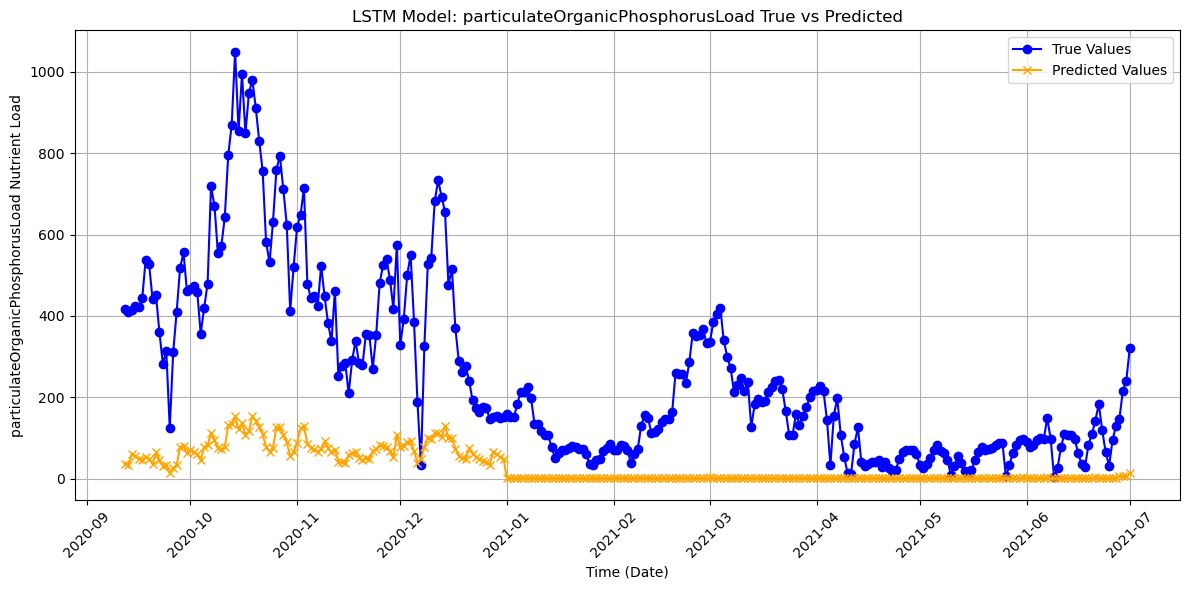

Epoch 1/20


E:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 34781.1758 - val_loss: 5117.4497
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 40367.7695 - val_loss: 5095.0356
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 42758.5039 - val_loss: 5061.7803
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 38546.5742 - val_loss: 5009.6548
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 42191.9922 - val_loss: 4931.7720
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 38545.8789 - val_loss: 4827.5542
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 38766.3047 - val_loss: 4694.5381
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 43835.3008 - val_loss: 4538.8379
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31224.1758 - val_loss: 4361.1226
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 41186.8828 - val_loss: 4168.0820
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 37881.4609 - val_loss: 3970.0461
Epoch 1

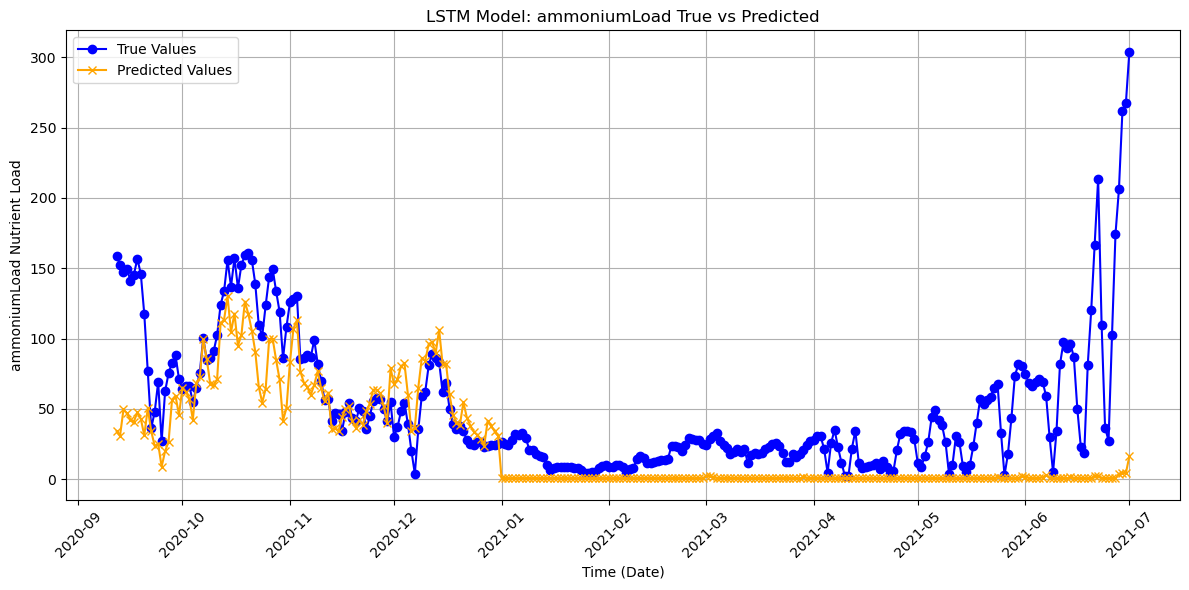

Epoch 1/20


E:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 27702606.0000 - val_loss: 21215314.0000
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22242932.0000 - val_loss: 21213554.0000
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22371446.0000 - val_loss: 21210768.0000
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 27686646.0000 - val_loss: 21206408.0000
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23425848.0000 - val_loss: 21199994.0000
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 27168038.0000 - val_loss: 21191314.0000
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28461220.0000 - val_loss: 21180104.0000
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24612290.0000 - val_loss: 21166422.0000
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 27045512.0000 - val_loss: 21150252.0000
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 21698766.0000 - val_loss: 21130760.0000
Epoch 11/20
37/37 ━━━━━━━━━━━

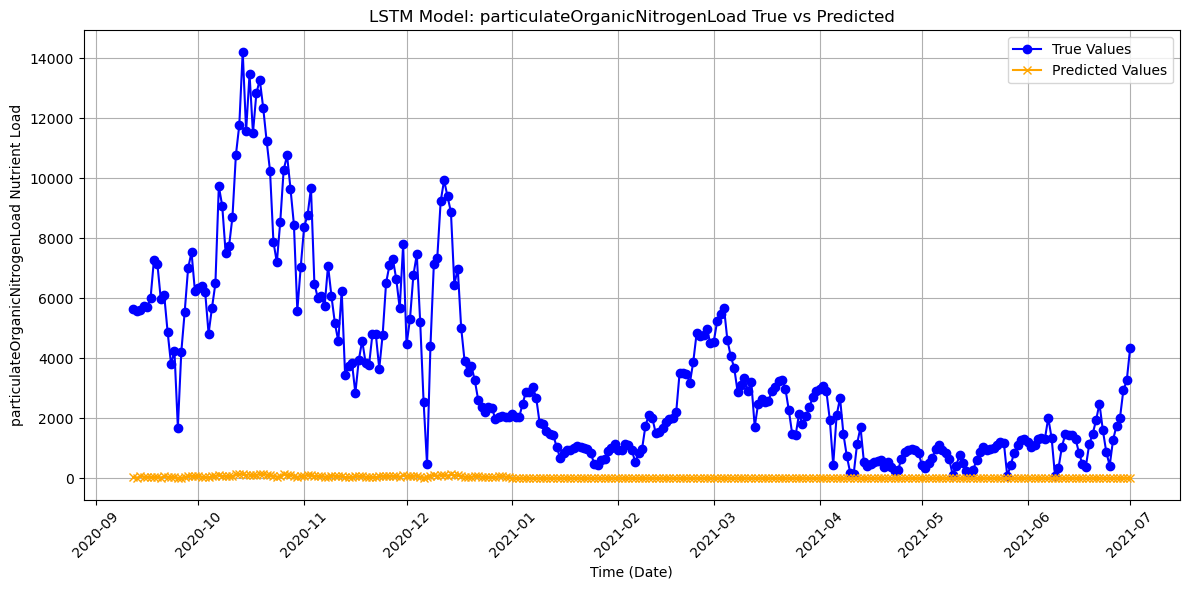

Epoch 1/20


E:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 13206761.0000 - val_loss: 19069012.0000
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12090225.0000 - val_loss: 19067416.0000
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12238387.0000 - val_loss: 19064798.0000
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13552238.0000 - val_loss: 19060520.0000
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12980280.0000 - val_loss: 19053690.0000
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12721698.0000 - val_loss: 19044312.0000
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12635397.0000 - val_loss: 19031660.0000
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11314705.0000 - val_loss: 19015894.0000
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12664659.0000 - val_loss: 18995568.0000
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11515469.0000 - val_loss: 18972634.0000
Epoch 11/20
37/37 ━━━━━━━━━━━

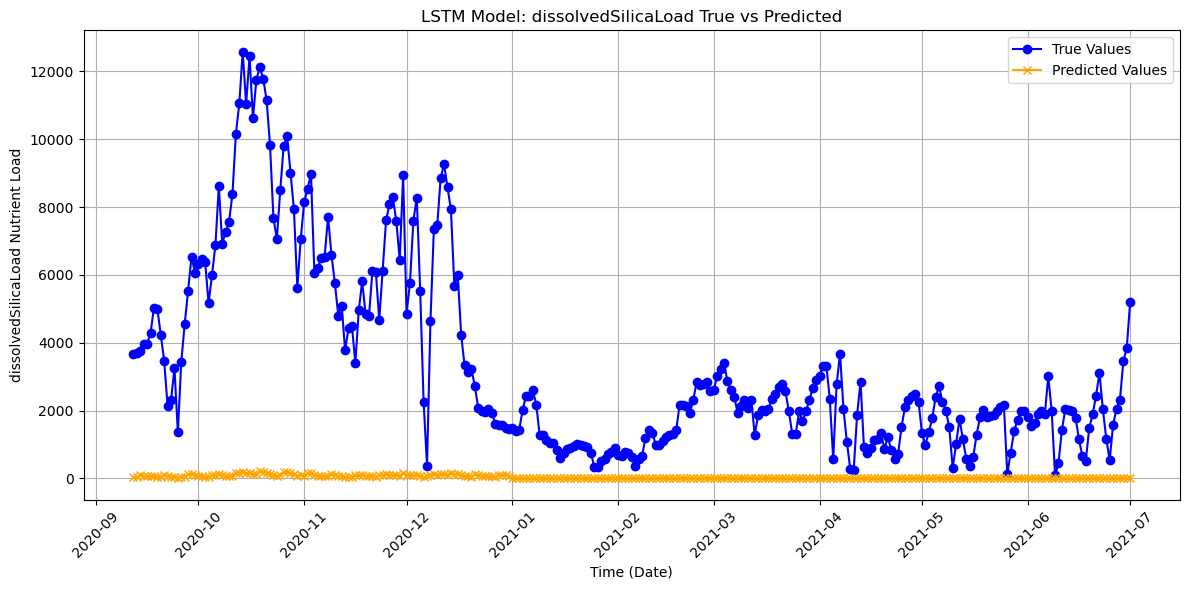

Epoch 1/20


E:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 22170.5039 - val_loss: 19149.7207
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19589.4824 - val_loss: 19097.1836
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19679.6875 - val_loss: 19012.9785
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19149.0547 - val_loss: 18876.1348
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19128.7461 - val_loss: 18685.5391
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23680.4844 - val_loss: 18420.1914
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20991.5215 - val_loss: 18078.8105
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18338.4473 - val_loss: 17675.2207
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16772.3145 - val_loss: 17166.8320
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18296.1934 - val_loss: 16571.6816
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16191.1504 - val_loss: 15936.8

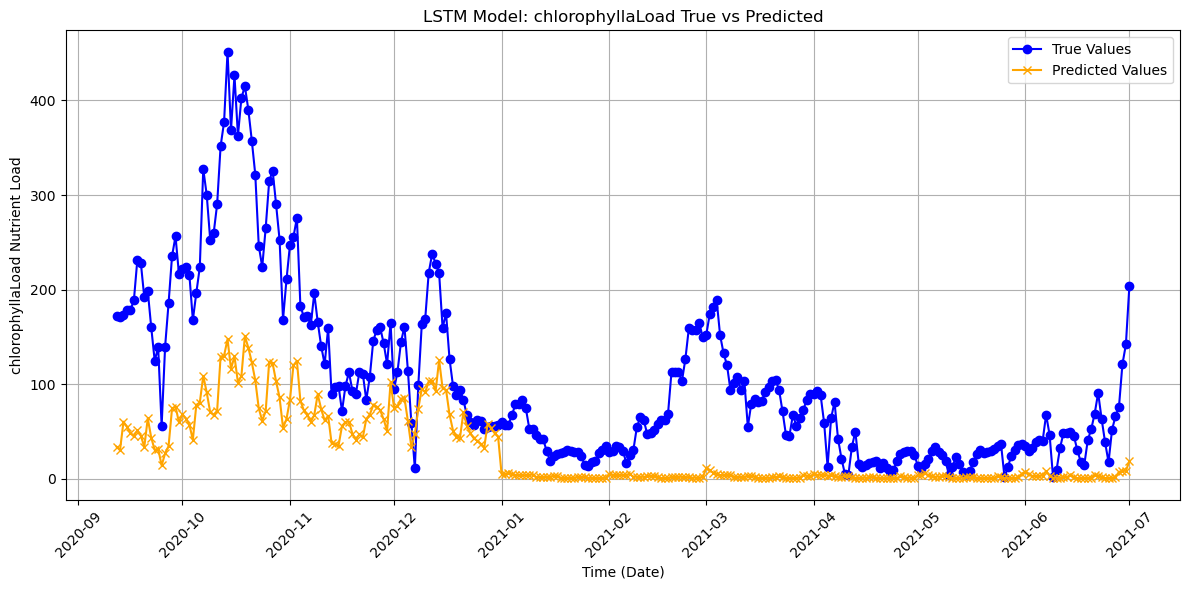

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import r2_score, mean_squared_error

# 读取数据集
data = pd.read_csv('002.csv')

# 处理日期和时间特征
data['SampleDate'] = pd.to_datetime(data['SampleDate'])
data['Year'] = data['SampleDate'].dt.year
data['Month'] = data['SampleDate'].dt.month
data['Day'] = data['SampleDate'].dt.day
data['Weekday'] = data['SampleDate'].dt.weekday

data_cleaned = data.drop(columns=['Description', 'SampleDate'])

target_columns = ['salinityLoad', 'phosphateLoad', 'particulateOrganicPhosphorusLoad', 
                  'ammoniumLoad', 'particulateOrganicNitrogenLoad', 'dissolvedSilicaLoad', 'chlorophyllaLoad']

for target in target_columns:
    y = data_cleaned[target]

    X = data_cleaned[['Flow', 'Year', 'Month', 'Day', 'Weekday']]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

    X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    lstm_model = Sequential()
    lstm_model.add(LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
    lstm_model.add(Dense(1))  

    lstm_model.compile(optimizer='adam', loss='mean_squared_error')

    lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test))

    y_pred_lstm = lstm_model.predict(X_test_lstm)

    r2_lstm = r2_score(y_test, y_pred_lstm)
    mse_lstm = mean_squared_error(y_test, y_pred_lstm)
    print(f"{target} LSTM R²: {r2_lstm}")
    print(f"{target} LSTM MSE: {mse_lstm}")

    plt.figure(figsize=(12, 6))
    plt.plot(data['SampleDate'].iloc[len(y_train):], y_test.values, label='True Values', color='blue', linestyle='-', marker='o')
    plt.plot(data['SampleDate'].iloc[len(y_train):], y_pred_lstm, label='Predicted Values', color='orange', linestyle='-', marker='x')
    plt.title(f'LSTM Model: {target} True vs Predicted')
    plt.xlabel('Time (Date)')
    plt.ylabel(f'{target} Nutrient Load')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the model
rf_model = RandomForestRegressor(random_state=42)

# Setup the grid search
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Best parameters
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")

# Predict with the best model
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test)

# Evaluate model performance
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Best Model R²: {r2_rf}")
print(f"Random Forest Best Model MSE: {mse_rf}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Random Forest Best Model R²: 0.9136109469466716
Random Forest Best Model MSE: 739.3246306284456


In [42]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for SVR
param_grid_svr = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1],
    'epsilon': [0.01, 0.1, 0.5]
}

# Instantiate the model
svr_model = SVR(kernel='rbf')

# Setup the grid search
grid_search_svr = GridSearchCV(estimator=svr_model, param_grid=param_grid_svr, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search_svr.fit(X_train, y_train)

# Best parameters
print(f"Best parameters for SVR: {grid_search_svr.best_params_}")

# Predict with the best model
y_pred_svr = grid_search_svr.best_estimator_.predict(X_test)

# Evaluate model performance
r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f"SVM Best Model R²: {r2_svr}")
print(f"SVM Best Model MSE: {mse_svr}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for SVR: {'C': 100, 'epsilon': 0.5, 'gamma': 0.01}
SVM Best Model R²: 0.9623944548233512
SVM Best Model MSE: 321.8313526384463


In [46]:
import kerastuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the model-building function for Keras Tuner
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=50, max_value=200, step=50), activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
    model.add(Dense(1))
    
    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']), loss='mean_squared_error')
    return model

# Initialize the tuner
tuner = kt.RandomSearch(build_model, objective='val_loss', max_trials=5, executions_per_trial=1, directory='lstm_tuning', project_name='phosphate_prediction')

# Search for the best hyperparameters
tuner.search(X_train_lstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test))

# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Predict with the best model
y_pred_lstm = best_model.predict(X_test_lstm)

# Evaluate model performance
r2_lstm = r2_score(y_test, y_pred_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
print(f"LSTM Best Model R²: {r2_lstm}")
print(f"LSTM Best Model MSE: {mse_lstm}")


Trial 5 Complete [00h 00m 06s]
val_loss: 6642.71875

Best val_loss So Far: 3592.812255859375
Total elapsed time: 00h 00m 31s


E:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
E:\Anaconda\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
LSTM Best Model R²: 0.5801848496399956
LSTM Best Model MSE: 3592.812630791735


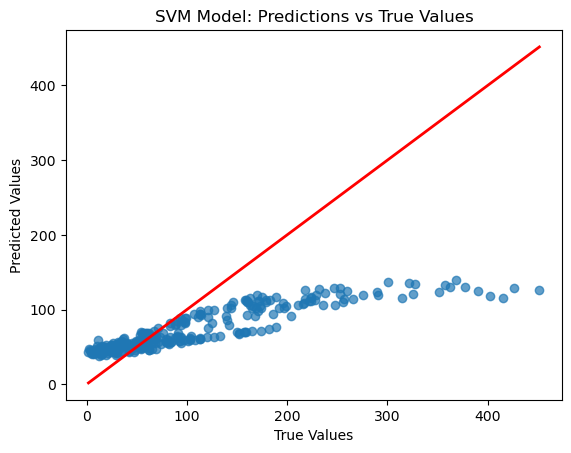

In [50]:
import matplotlib.pyplot as plt

y_pred = svm_model.predict(X_test)

plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('SVM Model: Predictions vs True Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()


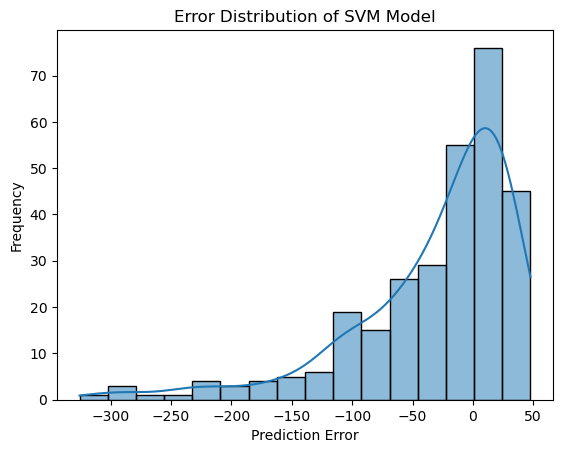

In [52]:
import seaborn as sns

errors = y_pred - y_test
sns.histplot(errors, kde=True)
plt.title('Error Distribution of SVM Model')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()


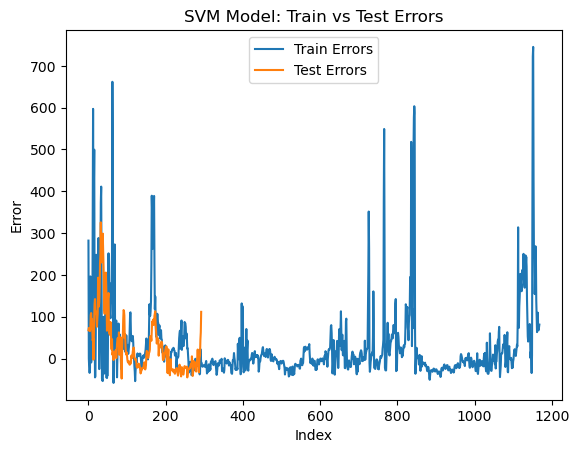

In [54]:
train_errors = y_train - svm_model.predict(X_train)
test_errors = y_test - y_pred

plt.plot(range(len(train_errors)), train_errors, label='Train Errors')
plt.plot(range(len(test_errors)), test_errors, label='Test Errors')
plt.legend()
plt.title('SVM Model: Train vs Test Errors')
plt.xlabel('Index')
plt.ylabel('Error')
plt.show()


salinityLoad SVR R²: 0.9240934954390374
salinityLoad SVR MSE: 72790.13904561897
phosphateLoad SVR R²: 0.4889361754037782
phosphateLoad SVR MSE: 175.07342192559912
particulateOrganicPhosphorusLoad SVR R²: 0.981254346998832
particulateOrganicPhosphorusLoad SVR MSE: 943.8212324613221
ammoniumLoad SVR R²: -1.648997110905278
ammoniumLoad SVR MSE: 6503.534675833056
particulateOrganicNitrogenLoad SVR R²: 0.8919449117896171
particulateOrganicNitrogenLoad SVR MSE: 998641.6521967299
dissolvedSilicaLoad SVR R²: 0.5044440595727704
dissolvedSilicaLoad SVR MSE: 3942051.4067532253
chlorophyllaLoad SVR R²: 0.9414610349801539
chlorophyllaLoad SVR MSE: 500.9812836350075


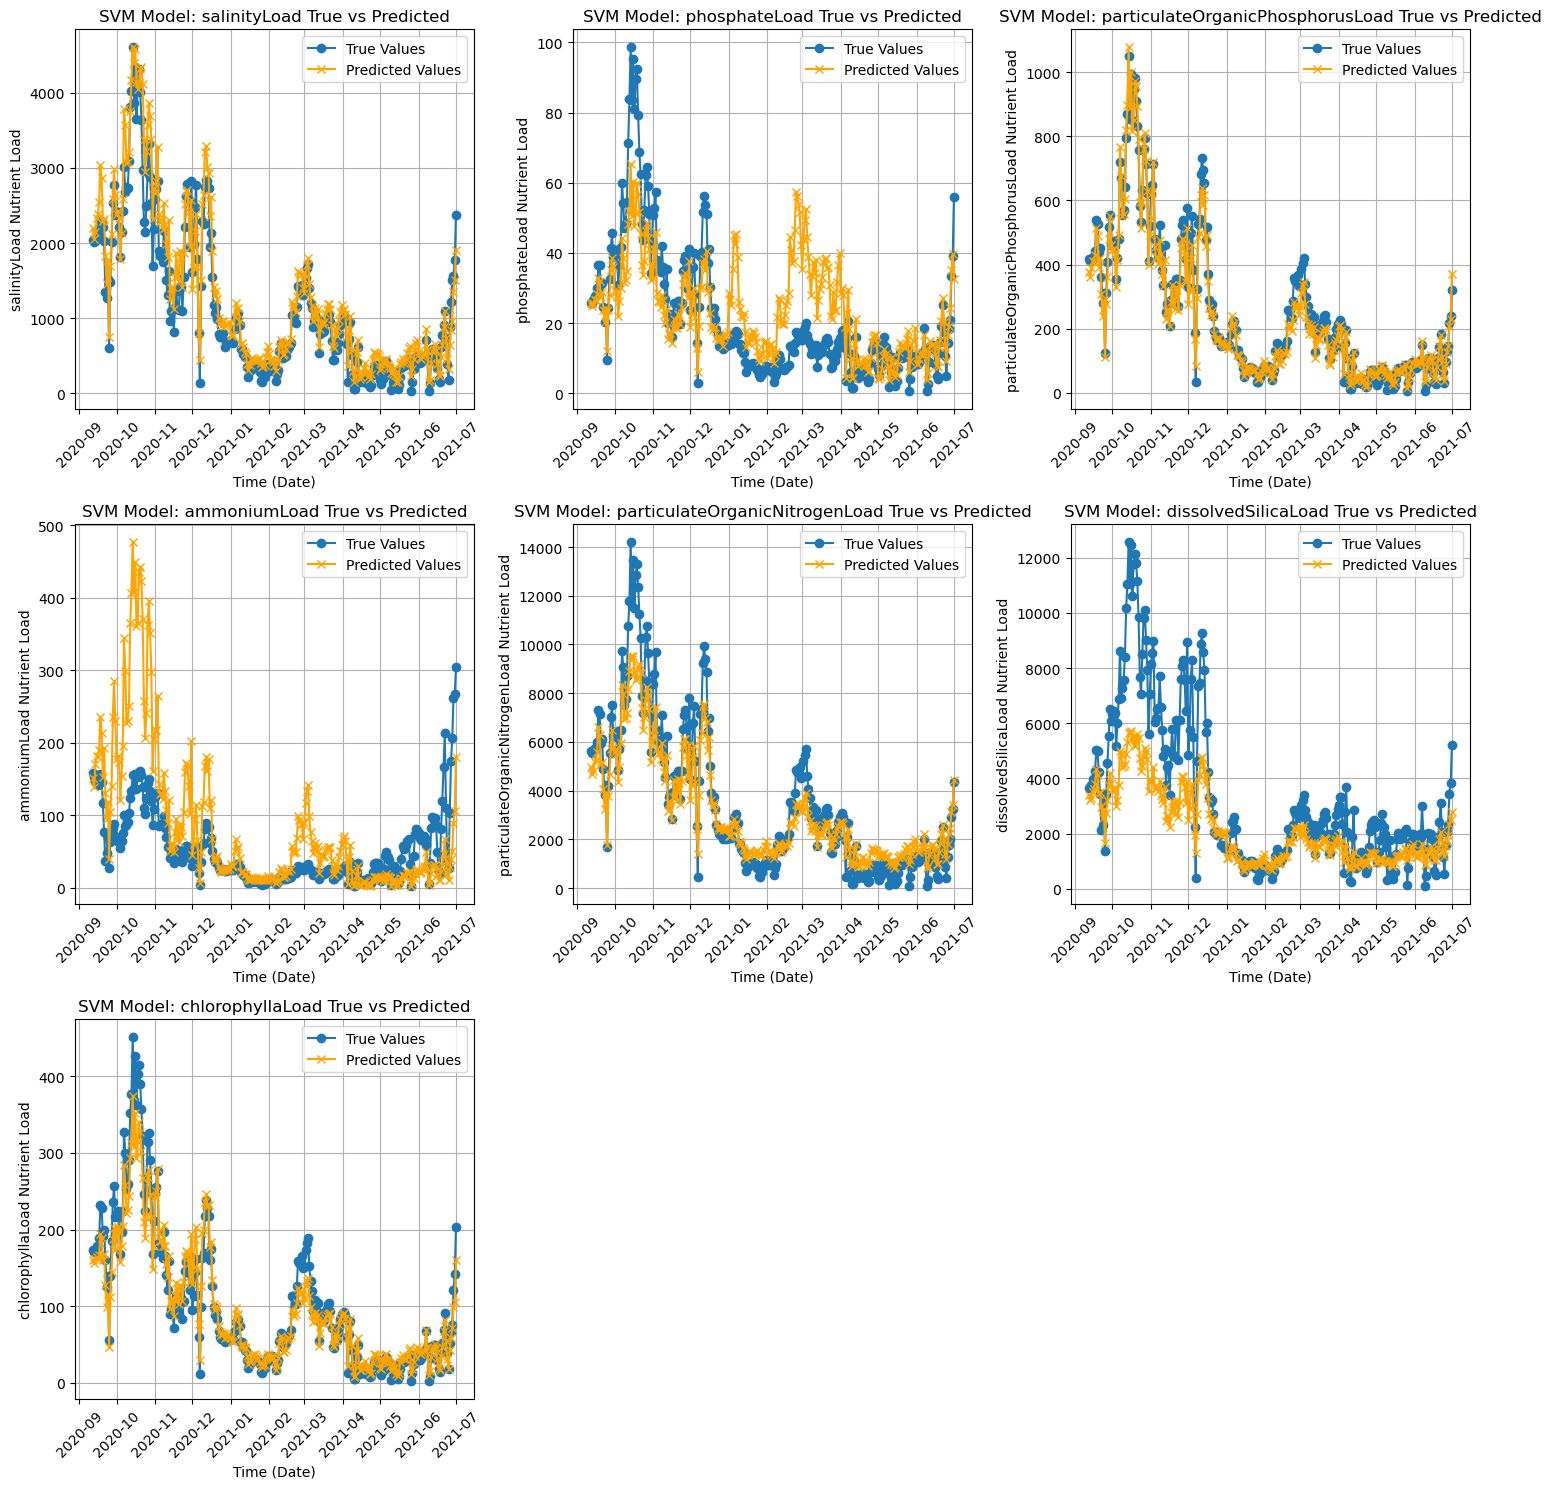

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

data = pd.read_csv('002.csv')

data['SampleDate'] = pd.to_datetime(data['SampleDate'])
data['Year'] = data['SampleDate'].dt.year
data['Month'] = data['SampleDate'].dt.month
data['Day'] = data['SampleDate'].dt.day
data['Weekday'] = data['SampleDate'].dt.weekday

data_cleaned = data.drop(columns=['Description', 'SampleDate'])

target_columns = ['salinityLoad', 'phosphateLoad', 'particulateOrganicPhosphorusLoad', 
                  'ammoniumLoad', 'particulateOrganicNitrogenLoad', 'dissolvedSilicaLoad', 'chlorophyllaLoad']

num_columns = 3  
num_rows = len(target_columns) // num_columns + (len(target_columns) % num_columns != 0)  # 计算需要的行数

fig, axs = plt.subplots(num_rows, num_columns, figsize=(15, 5*num_rows))

axs = axs.ravel()

for i, target in enumerate(target_columns):
    y = data_cleaned[target]
    X = data_cleaned[['Flow', 'Year', 'Month', 'Day', 'Weekday']]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

    svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.01)
    svr_model.fit(X_train, y_train)

    y_pred_svr = svr_model.predict(X_test)

    r2_svr = r2_score(y_test, y_pred_svr)
    mse_svr = mean_squared_error(y_test, y_pred_svr)

    print(f"{target} SVR R²: {r2_svr}")
    print(f"{target} SVR MSE: {mse_svr}")

    axs[i].plot(data['SampleDate'].iloc[len(y_train):], y_test.values, label='True Values',  linestyle='-', marker='o')
    axs[i].plot(data['SampleDate'].iloc[len(y_train):], y_pred_svr, label='Predicted Values', color='orange', linestyle='-', marker='x')
    axs[i].set_title(f'SVM Model: {target} True vs Predicted')
    axs[i].set_xlabel('Time (Date)')
    axs[i].set_ylabel(f'{target} Nutrient Load')
    axs[i].legend()
    axs[i].grid(True)
    axs[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

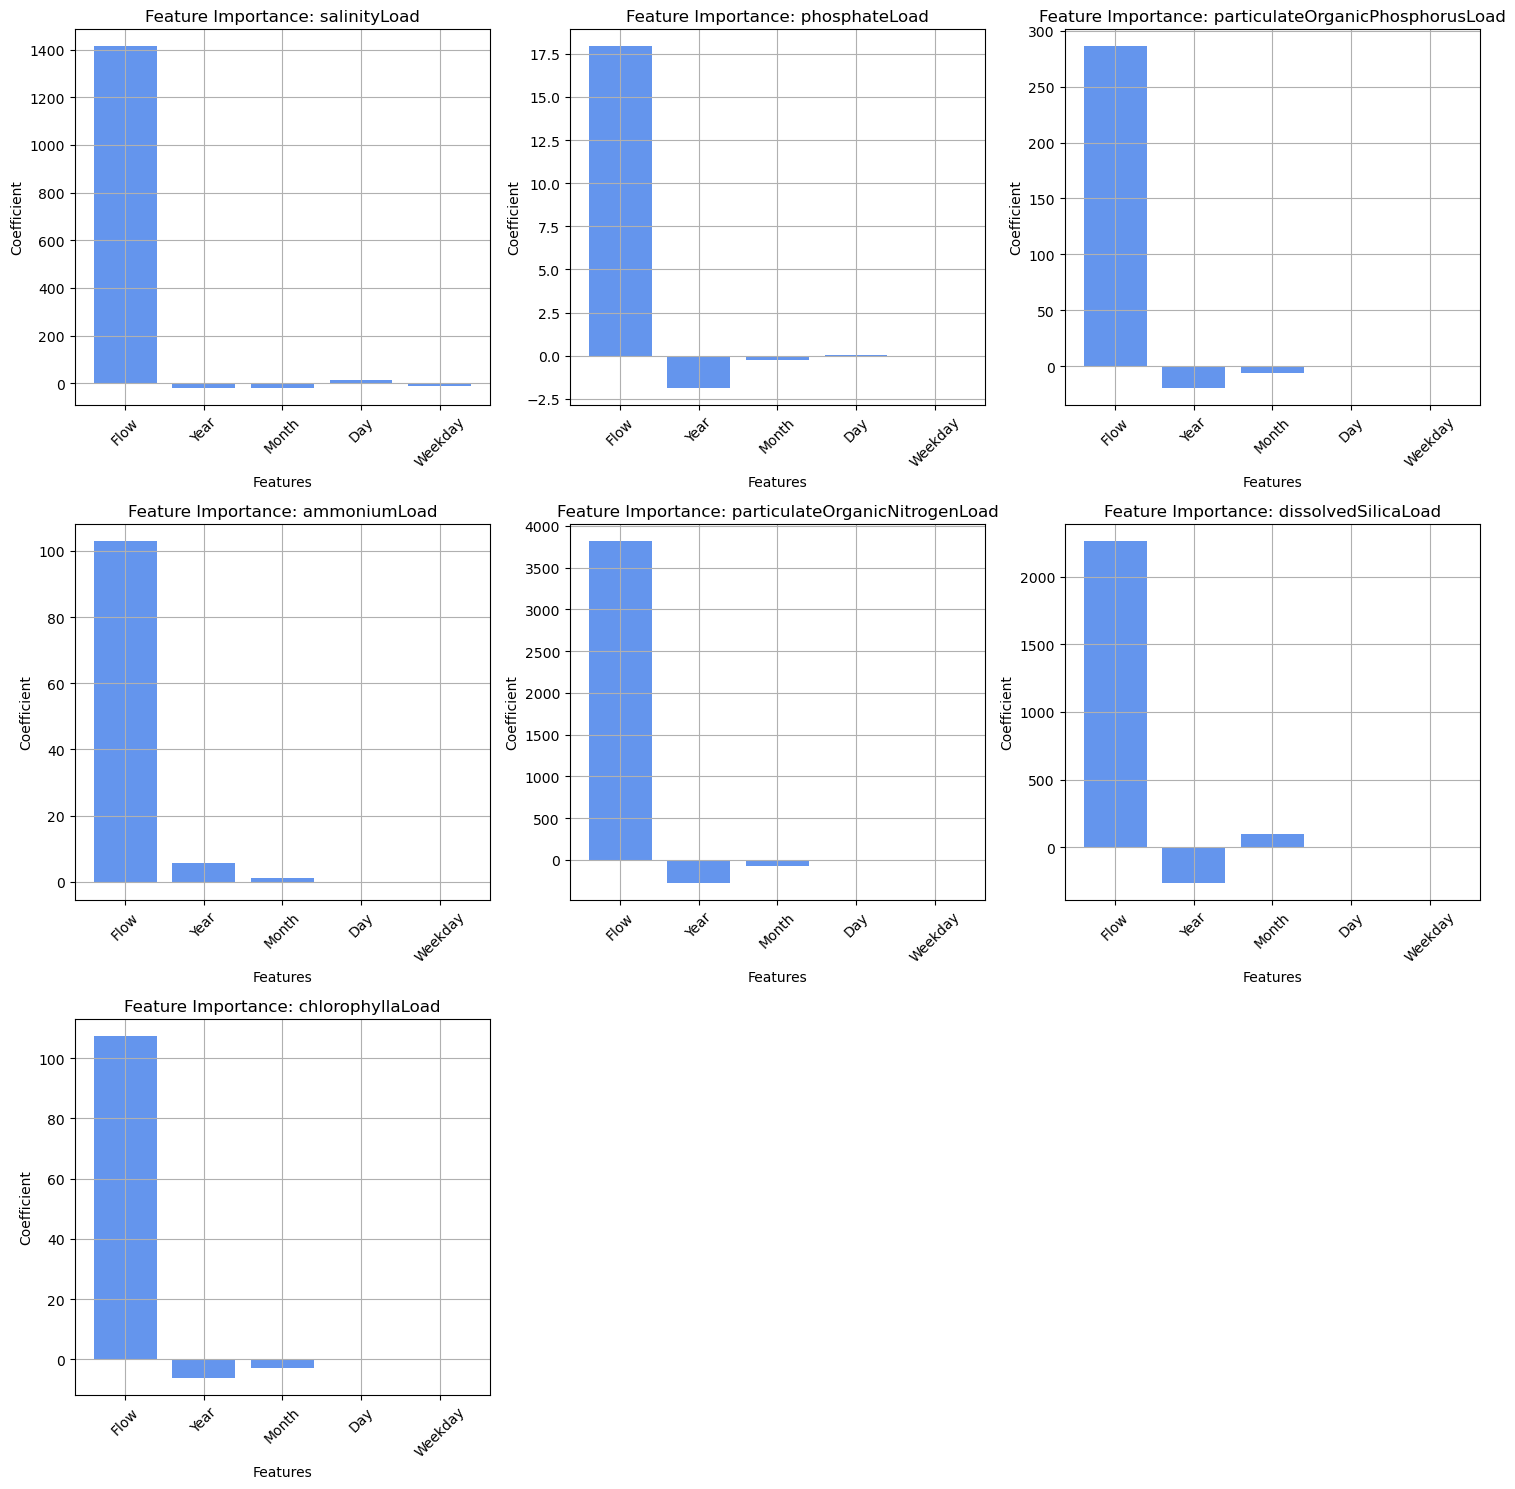

In [100]:
num_columns = 3
num_rows = len(target_columns) // num_columns + (len(target_columns) % num_columns != 0)

fig, axs = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))
axs = axs.ravel()

for i, target in enumerate(target_columns):
    y = data_cleaned[target]
    X = data_cleaned[['Flow', 'Year', 'Month', 'Day', 'Weekday']]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

    svr_model_linear = SVR(kernel='linear', C=100, gamma=0.1, epsilon=0.01)
    svr_model_linear.fit(X_train, y_train)

    importance = svr_model_linear.coef_[0] 

    axs[i].bar(range(len(importance)), importance, color='cornflowerblue')
    axs[i].set_title(f'Feature Importance: {target}')
    axs[i].set_xlabel('Features')
    axs[i].set_ylabel('Coefficient')
    axs[i].set_xticks(range(len(X.columns)))
    axs[i].set_xticklabels(X.columns, rotation=45)
    axs[i].grid(True)

for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

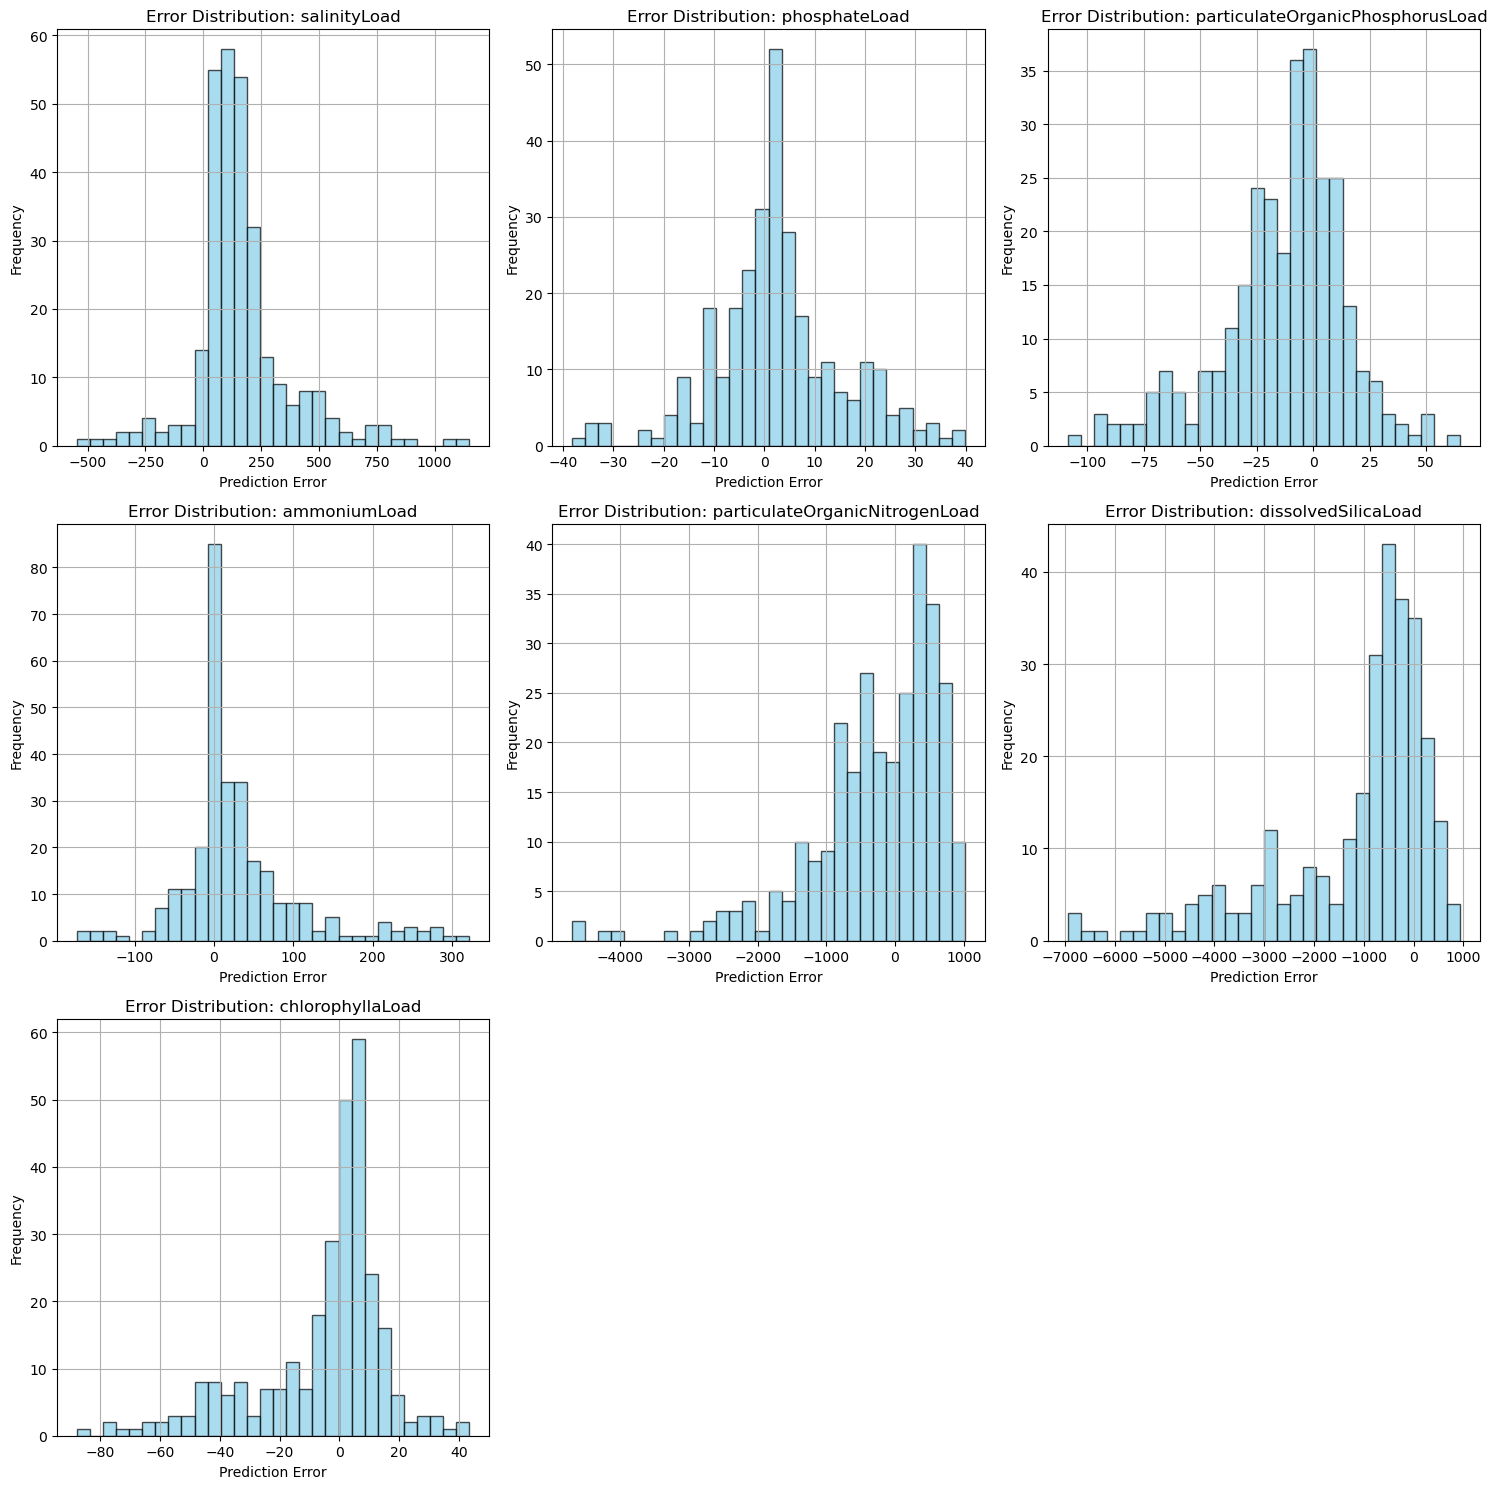

In [102]:
num_columns = 3
num_rows = len(target_columns) // num_columns + (len(target_columns) % num_columns != 0)

fig, axs = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))
axs = axs.ravel()

for i, target in enumerate(target_columns):
    y = data_cleaned[target]
    X = data_cleaned[['Flow', 'Year', 'Month', 'Day', 'Weekday']]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

    svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.01)
    svr_model.fit(X_train, y_train)

    y_pred_svr = svr_model.predict(X_test)
    errors = y_pred_svr - y_test

    axs[i].hist(errors, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axs[i].set_title(f'Error Distribution: {target}')
    axs[i].set_xlabel('Prediction Error')
    axs[i].set_ylabel('Frequency')
    axs[i].grid(True)


for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


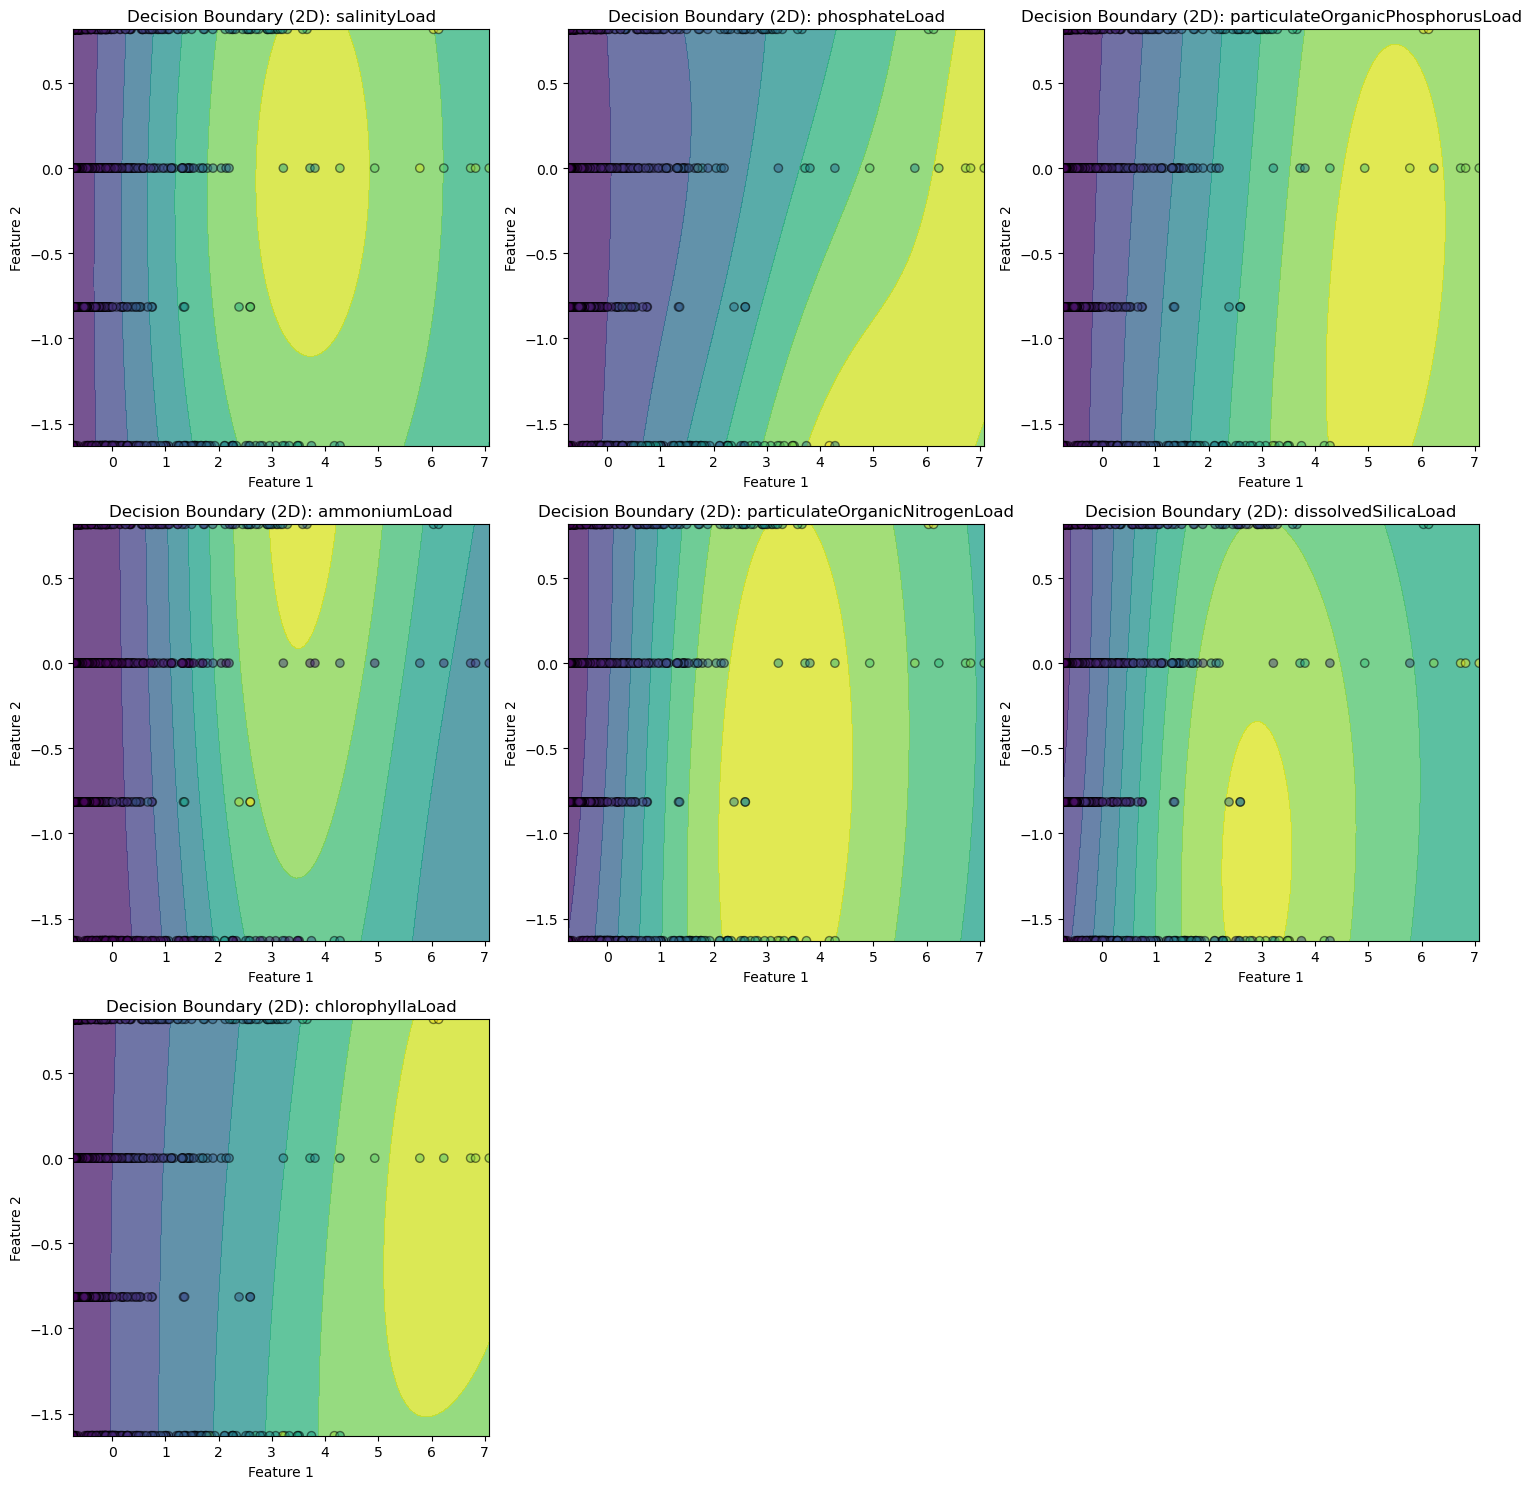

In [104]:
num_columns = 3
num_rows = len(target_columns) // num_columns + (len(target_columns) % num_columns != 0)

fig, axs = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))
axs = axs.ravel()

for i, target in enumerate(target_columns):
    y = data_cleaned[target]
    X = data_cleaned[['Flow', 'Year', 'Month', 'Day', 'Weekday']]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)


    X_train_2d = X_train[:, :2]

    svr_model_2d = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.01)
    svr_model_2d.fit(X_train_2d, y_train)

    xx, yy = np.meshgrid(
        np.linspace(X_train_2d[:, 0].min(), X_train_2d[:, 0].max(), 100),
        np.linspace(X_train_2d[:, 1].min(), X_train_2d[:, 1].max(), 100)
    )
    Z = svr_model_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    contour = axs[i].contourf(xx, yy, Z, alpha=0.75, cmap='viridis')
    axs[i].scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolors='k', marker='o', alpha=0.5)
    axs[i].set_title(f'Decision Boundary (2D): {target}')
    axs[i].set_xlabel('Feature 1')
    axs[i].set_ylabel('Feature 2')


for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


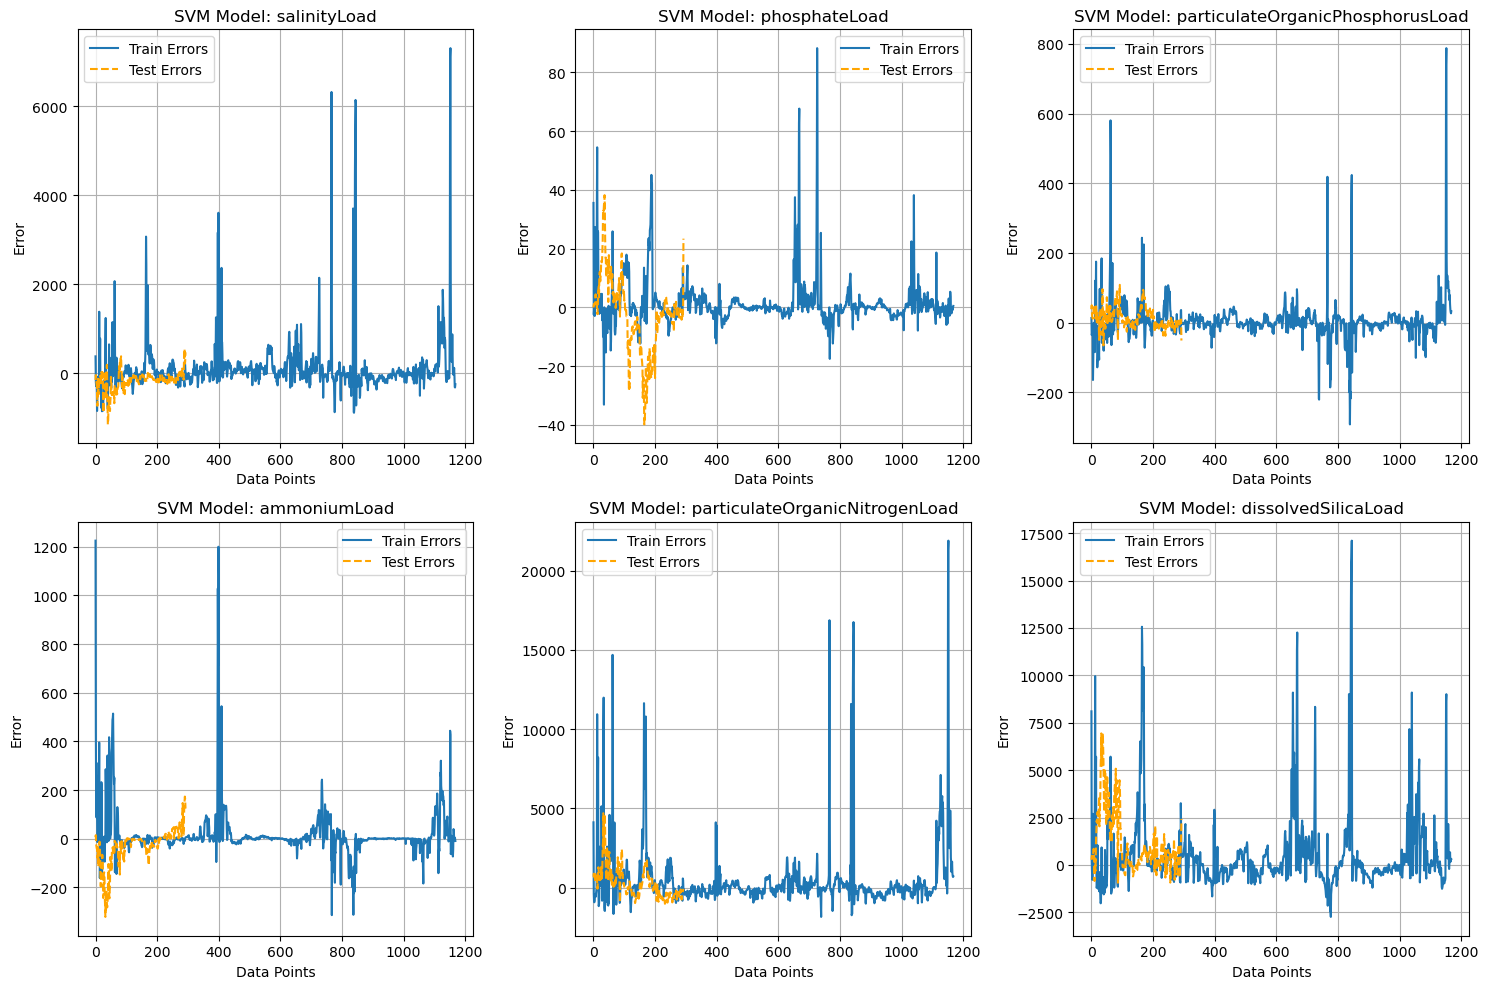

In [96]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import numpy as np


target_columns = ['salinityLoad', 'phosphateLoad', 'particulateOrganicPhosphorusLoad', 
                  'ammoniumLoad', 'particulateOrganicNitrogenLoad', 'dissolvedSilicaLoad']


num_columns = 3
num_rows = len(target_columns) // num_columns + (len(target_columns) % num_columns != 0)


fig, axs = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))
axs = axs.ravel() 

for i, target in enumerate(target_columns):
    y = data_cleaned[target]
    X = data_cleaned[['Flow', 'Year', 'Month', 'Day', 'Weekday']]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

    svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.01)
    svr_model.fit(X_train, y_train)

    y_pred_svr = svr_model.predict(X_test)

    train_errors = y_train - svr_model.predict(X_train)
    test_errors = y_test - y_pred_svr

    axs[i].plot(range(len(train_errors)), train_errors, label='Train Errors')
    axs[i].plot(range(len(test_errors)), test_errors, label='Test Errors', linestyle='--', color='orange')
    axs[i].set_title(f'SVM Model: {target}')
    axs[i].set_xlabel('Data Points')
    axs[i].set_ylabel('Error')
    axs[i].legend()
    axs[i].grid(True)

for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()